<a href="https://colab.research.google.com/github/Bkumarr/Helios/blob/master/Customer_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT

> **Predictive customer Analytics**

       > In predictive customer analytics, CLV and churn analysis using the customer segment data for analysis is fundamental for predicting transactional attributes such as recency, frequency and monetary.Identify high value customer through their purchase pattern and subsequently increase the purchase traction among them -forecast revenue from existing customers and therefore build a model using recency (defined as when was the last purchase made by the customer), monetary (defined as how much money was spent in the last month which had a purchase) slabs for each recency levels by identifying from the frequency distribution



In [0]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name =fn, length =len(uploaded[fn])))
  


Saving customer_data.csv to customer_data (2).csv
User uploaded file "customer_data.csv" with length 48995 bytes


In [0]:
uploaded

{'customer_data.csv': b'Customer Id,CustomerChurn,LastInvoiceDate,AvgInvoiceAmount,LocationName,Zip,AvgMiles,NoCalls,ClaimsMade,DelayedQuote,PickupDelay,DeliveryDelay,VolumeChange,PriceChangedPostQuote,CompetitorsPresent,CurrentInflation\r\n26342,1,05-Aug-14,4935,"Carlyle,Illinois",62231,433.5024921,0,0,0,0,0,0,0,0,1\r\n38851,0,17-Oct-17,24312,"White Rock,New Mexico",87547,2401.160037,0,0,1,1,1,0,0,0,1\r\n32312,0,31-Mar-16,5881,"Youngstown,Ohio",44510,568.082307,0,0,0,0,0,0,0,0,1\r\n46203,0,17-Mar-14,19058,"Santa Clarita,California",91350,1865.804156,0,0,0,1,1,0,0,0,0\r\n12234,0,05-May-14,15413,"Largo,Florida",33779,1501.318918,1,0,0,0,0,0,0,0,1\r\n50387,0,01-Sep-16,12187,"Preston,Oklahoma",74456,1173.738409,0,0,1,1,1,0,0,0,1\r\n33515,0,09-Nov-17,25010,"Astor,Florida",32102,2441.015116,0,0,0,0,0,0,0,0,1\r\n39650,1,18-Aug-14,9346,"Ann Arbor, MI ",48108,869.567879,0,0,0,1,1,1,0,1,1\r\n2862,0,25-Jun-17,37314,"Huntington Beach,California",92649,3711.39158,0,0,1,1,1,0,0,0,1\r\n32796,0,30-Oc

In [0]:
import io

In [0]:
file= pd.read_csv(io.StringIO(uploaded['customer_data.csv'].decode('utf-8')))

**Performing Regression on the dataset for correlated variables using Seaborn**



1.   AvgInvoiceAmount (dependent variable)- Because it depends on distance of the location from company's distribution channels to give significant 
advantage to decide if regions are among the nodes of routable location and also what is the mode of communication used as contact.


2.   AvgMiles(independent variable) - Determines the randomness of the purchase pattern.



In [0]:
from pandas import DataFrame, Series
import numpy as np
df = pd.DataFrame(file)
data = pd.DataFrame({'AvgInvoiceAmount':np.array(df.AvgInvoiceAmount), 'AvgMiles':np.array(df.AvgMiles)})

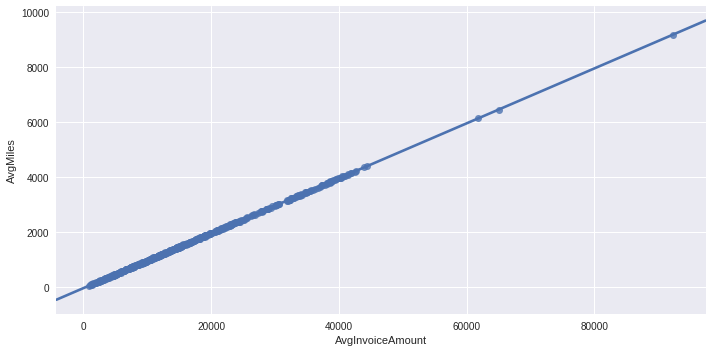

In [0]:
import seaborn as sns #relies on matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.lmplot('AvgInvoiceAmount','AvgMiles', data, size =5, aspect =2)
plt.tight_layout()

As this nature of graph shows a positive correlation, points are less dispersed having only three data points marked around the edge (No outlier )

The major factor or qualitative analysis can be made  from the above linear plot having closely packed to the rest of the points. Considering the **currentInflation** factor, in regions like **Washington** (cap) has got a high scale of purchase power when compared to the other  regions . Another inference through the below analysis is that 70% customer churn is from region that has respective value of 15k **AvgInvoiceAmount** (As the NoCalls distribution increases which is an indication of markov chain that is sighted here for predicting churn)

In [0]:
##Verification of the relationship between AvgInvoiceAmount and other \\
##Business improvement variables like "NoCalls" "ClaimsMade".."DeliveryDelay" etc



dis = pd.DataFrame({'AvgInvoiceAmount':np.where([df['AvgInvoiceAmount'] > 60000]), 'DeliveryDelay':np.where([df['DeliveryDelay'] ==1])})
print(dis)



a = df.groupby('DeliveryDelay').agg({'AvgInvoiceAmount': 'sum', 'AvgMiles' : 'sum'})
print(a)




  AvgInvoiceAmount                                      DeliveryDelay
0        [0, 0, 0]  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1  [327, 354, 509]  [1, 3, 5, 7, 8, 10, 40, 53, 65, 449, 462, 467,...
               AvgInvoiceAmount       AvgMiles
DeliveryDelay                                 
0                       9677704  942816.011610
1                        300355   29325.401428


We can have inference that 3 % of the transaction amount have been affected in the above data. So the delivery delay is a part of regression's learning rate  and could be subjected to  **Travelling Salesman Problem**:

*   However operations research techniques like linear programming for an optimal solution is lacking from the above table 
*   Traditionally, Big data problem involves velocity, volume, veracity and variety.



In a **TSP**, a salesman visits n cities from a starting point exactly once and returns where the distance covered will be a minimum to complete the tour for this logistics service provider. Operations research here includes the routes available to location of warehouse to customer as the objective functions and zipcode region feasibility as constraints to tackle optimisation

In [0]:

df_zip= df.groupby('Zip').agg({'AvgInvoiceAmount': 'sum', 'AvgMiles' : 'sum'})
pd.pivot_table(df_zip, index = ['Zip'])

,AvgInvoiceAmount,AvgMiles
Zip,,
94103-1307,28080,2767.960204
10003,12182,1178.197817
10025,7247,704.737686
10172,35434,3483.353333
10272,11990,1163.999681
10307,30659,3025.895059
10459,17934,1773.393595
10710,7841,759.053879
1080,39571,3917.103321


In [0]:
## reason for delivery delays
dff= pd.concat([df.DeliveryDelay,df.AvgMiles]).sort_index()
dfi = pd.DataFrame({'AvgMiles': np.array(df.AvgMiles), 'DeliveryDelay':np.array(df.DeliveryDelay)})
dfi.groupby(['DeliveryDelay']).count()


,AvgMiles
DeliveryDelay,
0,581
1,19


In [0]:
# Studying the TREND in customer segmentation by buying pattern and set out various metrics to measure profits YOY and churn rate

dfi= pd.DataFrame({'LastInvoiceData': np.array(df['LastInvoiceDate']), 'DeliveryDelay':np.array(df['DeliveryDelay']), 'AvgInvoiceAmount': np.array(df['AvgInvoiceAmount']), 'Zip' : np.array(df['Zip'])})
print(dfi)

     AvgInvoiceAmount  DeliveryDelay LastInvoiceData          Zip
0                4935              0       05-Aug-14        62231
1               24312              1       17-Oct-17        87547
2                5881              0       31-Mar-16        44510
3               19058              1       17-Mar-14        91350
4               15413              0       05-May-14        33779
5               12187              1       01-Sep-16        74456
6               25010              0       09-Nov-17        32102
7                9346              1       18-Aug-14        48108
8               37314              1       25-Jun-17        92649
9               11154              0       30-Oct-14        77564
10              18914              1       08-Jan-16        17856
11              22981              0       17-Aug-15        90506
12              11336              0       28-Jan-17        46785
13               2700              0       13-May-14        35469
14        

**Business Requirement**: 



```
# Markov chain  for important use case to predict the customer purchase in future
```


To arrest the churn and increase customer spend

     >    To find out the RFM scores depending on purchases using lifetimes library in python




To identify high value customer through their purchase pattern and subsequently increase the purchase traction among them 

      > Building RFM scores


    




In [0]:
# YoY revenue made 
dfi= pd.DataFrame({'LastInvoiceData': np.array(df['LastInvoiceDate']), 'NoCalls':np.array(df['NoCalls']), 'AvgInvoiceAmount': np.array(df['AvgInvoiceAmount'])})


s_data= dfi.groupby(['LastInvoiceData'])['AvgInvoiceAmount'].apply(lambda x : np.sum(x))

st_Data= pd.DataFrame(s_data, columns= ['AvgInvoiceAmount'])

st_Data.to_csv('time.csv')


import matplotlib.image as mpimg
import os
# First, load the image
dir_path = os.path.dirname(os.path.realpath("__file__"))
filename = dir_path + "/a.png"

# Load the image
image = mpimg.imread(filename)

# Print out its shape
print(image.shape)

## Data split for monthly transaction using SQL (db2) in SQL - Using Python


(301, 491, 3)


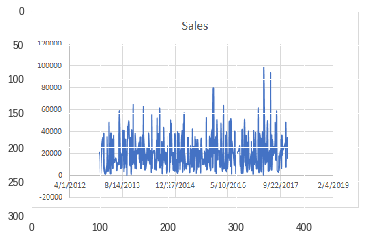

In [0]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

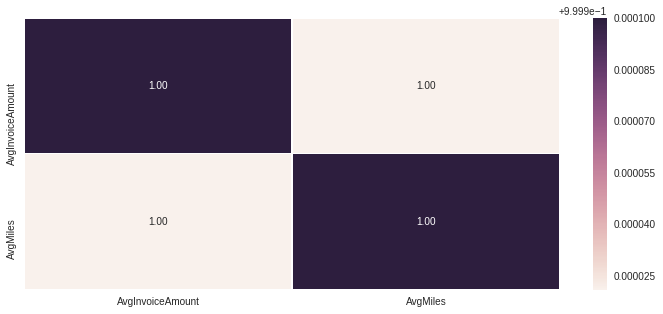

In [0]:
#Plots 

f,ax = plt.subplots(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.2,linecolor="white", fmt= '.2f',ax=ax),
plt.show()

In [0]:
#Some interesting finding for customer segmentation

dfi = pd.DataFrame({'AvgMiles': np.array(df.AvgMiles), 'ClaimsMade':np.array(df.ClaimsMade)})
dfi.groupby(['ClaimsMade']).count()

,AvgMiles
ClaimsMade,
0,571
1,20
2,8
3,1


In [0]:
#Some interesting finding for storytelling

dfi = pd.DataFrame({'AvgMiles': np.array(df.AvgMiles), 'CompetitorsPresent':np.array(df.CompetitorsPresent)})
dfi.groupby(['CompetitorsPresent']).count()


,AvgMiles
CompetitorsPresent,
0,580
1,20


In [0]:
#Some interesting finding for Contractual or Non- contractual customer segments

dfi = pd.DataFrame({'AvgMiles': np.array(df.AvgMiles), 'CurrentInflation':np.array(df.CurrentInflation)})
dfi.groupby(['CurrentInflation']).count()

,AvgMiles
CurrentInflation,
0,276
1,324


In [0]:
#Some interesting finding for Business problems

dfi = pd.DataFrame({'AvgMiles': np.array(df.AvgMiles), 'NoCalls':np.array(df.NoCalls)})
dfi.groupby(['NoCalls']).count()

,AvgMiles
NoCalls,
0,531
1,28
2,13
3,8
4,9
5,11


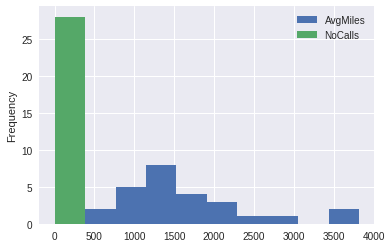

In [0]:
dfi.loc[dfi['NoCalls'] == 1].plot(kind ='hist')


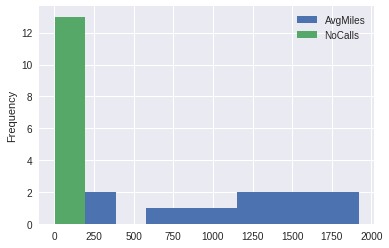

In [0]:
dfi.loc[dfi['NoCalls'] == 2].plot(kind ='hist')

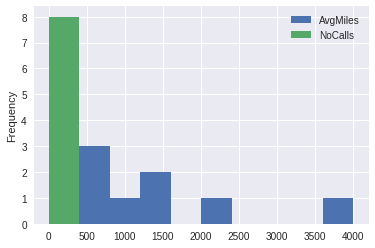

In [0]:
dfi.loc[dfi['NoCalls'] == 3].plot(kind ='hist')

In [0]:
import seaborn as sns
dataframe = df.copy()
dataframe['States'] = (dataframe.LocationName.apply(lambda x:x.split(',')[-1])).apply(lambda y:y.rstrip()).apply(lambda y:y.lstrip())

dfi = pd.DataFrame({'LocationName': np.array(dataframe.States), 'CurrentInflation':np.array(df.CurrentInflation)})


dataframe['States'] = dataframe.States.replace({'AL' : 'Alabama','AZ' : 'Arizona','CA':'California','FL':'Florida','GA':'Georgia',
    'IL':'Illinois','MA':'Massachusetts','MI':'Michigan','OH':'Ohio','MO':'Missouri','PA':'Pennsylvania', 'NY': 'New York','TX':'Texas','WA':'Washington'})


g_chart = dataframe.groupby('States').agg({'AvgInvoiceAmount' : 'sum'})
g_chart

,AvgInvoiceAmount
States,
Alabama,149421
Arizona,142277
Arkansas,98395
California,1118925
Colorado,81343
Connecticut,67049
Delaware,12556
District of Columbia,3301
Florida,542351


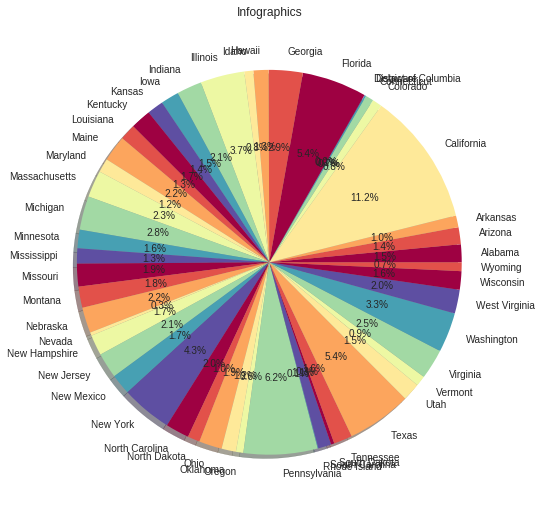

In [0]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
plt.figure(1, figsize=(50,50))
the_grid = GridSpec(1,5)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Infographics')
df_pie = plt.pie(g_chart, labels= g_chart.index, autopct='%1.1f%%', shadow=True, colors=colors)


# Customer churn Analysis

**Inference** :From the above descriptive statistics we can infer that Call / support related business decisions can be analysed for increasing the customers spends, supporting this with evidence that AvgInvoiceAmount column is highly correlated to distance for delivery.

As the customer churn can't be predicted for customers, due to multiple dimensionality in the dataset. The below steps are followed.

Hypothesis testing for finding significant variables: To find out which variables are independent of the response variable and finding the statistic (P- value) using chi-squared test of independence for getting a better classification scores

In [0]:
from sklearn.feature_selection import SelectKBest
%matplotlib inline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
import datetime as dt
from sklearn import preprocessing
 
from sklearn.feature_selection import SelectKBest
%matplotlib inline



file = pd.read_csv("customer_data.csv")



le = preprocessing.LabelEncoder()
file['Zip']= le.fit_transform(file['Zip'].astype('str'))
file['LastInvoiceDate'] = le.fit_transform(file['LastInvoiceDate'].astype('str'))


X= file.drop(["CustomerChurn", "LocationName"],  axis =1 )
y = file.CustomerChurn


chi2_selector = SelectKBest(chi2, k=4)
X_kbest = chi2_selector.fit_transform(X, y)


X_kbest

array([[26342.       ,   160.       ,  4935.       ,   433.5024921],
       [38851.       ,   490.       , 24312.       ,  2401.160037 ],
       [32312.       ,   336.       ,  5881.       ,   568.082307 ],
       ...,
       [47439.       ,     0.       , 17916.       ,  1751.595427 ],
       [34000.       ,   113.       , 34003.       ,  3355.299417 ],
       [52006.       ,   117.       ,  9131.       ,   853.1200328]])



> **Feature  importance** has been carried out in the the above step for customer segments

Preprocessing : Not required as the chi-squared Distribution does not have to be a normal distribution





**Feature Selection**

> Using KD tree from classification and regression ( CART)



In [0]:
from sklearn.neighbors import KDTree #Augmenting the observed categorical outcomes
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=13, algorithm='kd_tree').fit(X) 
distances, indices = nbrs.kneighbors(X)
distances
dfo= pd.DataFrame(distances)
dfo


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,601.545388,1437.113908,1480.639143,1777.686786,2202.513612,2246.153300,2423.021176,2472.554761,2520.034681,3398.684490,3497.254073,3630.283336
1,0.0,1452.097455,2232.887740,2676.923721,2943.798722,3176.149237,3322.076630,3646.318671,4585.058503,4600.430128,4670.924109,4773.191372,5114.434535
2,0.0,635.960474,1182.918509,1302.986542,1329.654456,1613.709690,1786.050152,2157.543261,2694.346429,2836.043991,2961.444934,3517.982367,3571.510699
3,0.0,1257.149264,1283.465508,1697.383467,2484.855832,2623.827643,2712.523636,2773.677695,2943.872359,3051.708486,3133.586529,3165.692174,3571.190376
4,0.0,1355.248029,1390.772393,1577.947309,1644.168166,1977.112430,2137.846159,2355.575350,2706.873686,2922.663918,3040.996936,3063.075950,3256.775307
5,0.0,1334.251687,1754.375671,1790.066994,2196.695935,2324.337928,2574.440550,2600.612699,2672.327597,2781.107733,2828.572223,2829.271997,3074.448494
6,0.0,1721.648454,1803.526369,2596.398689,2673.396406,3194.705281,3585.448783,4104.348317,4291.254095,5178.769851,5200.553272,5311.543075,5396.035992
7,0.0,607.259892,1211.979938,1302.511067,1434.169346,1635.427608,1923.175474,2237.120548,2426.618377,2448.779086,2560.248877,2649.297922,2709.385329
8,0.0,837.354242,3395.426093,3996.035445,4162.395811,4952.506136,5341.574169,5517.978983,5562.297642,6423.677408,6594.662694,6714.669946,6746.863320
9,0.0,1009.903298,1589.492949,1664.158223,1732.300740,2308.295579,2482.609700,2680.508324,2916.186884,2986.048950,3021.421331,3077.792441,3160.474107


In [0]:
#Analysis performed in SQL 
    
from pandas import DataFrame, Series
Market_basket = pd.read_csv("C0c0.csv")
print(Market_basket)
  
customer_df = pd.DataFrame(De_no3)
customer_df
# SQL SYNTAX USED 

#select LastInvoiceDate, monthname(LastInvoiceDate) from table \
     #where CustomerChurn = 0 and CompetitorsPresent = 0

    LastInvoiceDate          2
0        2017-10-17    October
1        2016-03-31      March
2        2014-03-17      March
3        2014-05-05        May
4        2016-09-01  September
5        2017-11-09   November
6        2017-06-25       June
7        2014-10-30    October
8        2016-01-08    January
9        2015-08-17     August
10       2017-01-28    January
11       2014-05-13        May
12       2016-02-05   February
13       2015-03-14      March
14       2014-11-29   November
15       2013-06-18       June
16       2014-02-14   February
17       2017-01-05    January
18       2015-04-28      April
19       2014-03-04      March
20       2013-01-12    January
21       2013-01-27    January
22       2013-08-12     August
23       2015-01-22    January
24       2015-12-07   December
25       2015-08-15     August
26       2016-06-13       June
27       2014-09-06  September
28       2017-07-05       July
29       2017-03-03      March
..              ...        ...
505     

,MONTH_,Customer_Id,AvgInvoiceAmount,LastInvoiceDate,NoCalls
0,October,38851,24312,2017-10-17,0
1,March,32312,5881,2016-03-31,0
2,March,46203,19058,2014-03-17,0
3,May,12234,15413,2014-05-05,1
4,September,50387,12187,2016-09-01,0
5,November,33515,25010,2017-11-09,0
6,June,2862,37314,2017-06-25,0
7,October,32796,11154,2014-10-30,0
8,January,47370,18914,2016-01-08,0
9,August,38284,22981,2015-08-17,1


In [0]:
# So the total count of customers churned are 65 from the above plots
    # 45 + 20 = 65 // where this describes  competition with other service providers 
  
  # Inference from markov chain is due to effective churning in the last 2 years
    
from pandas import DataFrame, Series
Market_basket = pd.read_csv("C1c0.csv")
print(Market_basket)

customer_df = pd.DataFrame(De_no6)
customer_df

# SQL SYNTAX USED 

#select LastInvoiceDate, monthname(LastInvoiceDate) from table \
     #where CustomerChurn = 1 and CompetitorsPresent = 0

   LastInvoiceDate          2
0       2014-08-05     August
1       2014-01-05    January
2       2013-01-06    January
3       2014-08-04     August
4       2013-02-19   February
5       2013-09-03  September
6       2015-11-07   November
7       2014-09-24  September
8       2014-05-13        May
9       2015-03-20      March
10      2015-01-25    January
11      2013-05-07        May
12      2014-03-02      March
13      2015-11-18   November
14      2015-07-21       July
15      2013-07-13       July
16      2013-10-12    October
17      2013-05-21        May
18      2014-12-08   December
19      2015-06-26       June
20      2013-09-19  September
21      2014-06-30       June
22      2013-01-19    January
23      2014-07-23       July
24      2014-01-07    January
25      2014-12-15   December
26      2015-05-31        May
27      2014-02-05   February
28      2015-01-14    January
29      2014-05-15        May
30      2013-03-21      March
31      2015-04-19      April
32      20

,MONTH_,Customer_Id,AvgInvoiceAmount,LastInvoiceDate,NoCalls
0,August,26342,4935,2014-08-05,0
1,January,36634,24353,2014-01-05,0
2,January,52724,2495,2013-01-06,2
3,August,27304,7144,2014-08-04,5
4,February,4721,7609,2013-02-19,5
5,September,29789,7359,2013-09-03,2
6,November,34366,21564,2015-11-07,4
7,September,57860,10426,2014-09-24,3
8,May,14360,15604,2014-05-13,3
9,March,28498,15424,2015-03-20,2


In [0]:
# So the total count of customers churned are 65 from the above plots
    # 45 + 20 = 65 // where this describes  competition with other service providers 
  
  # Inference from markov chain is due to effective churning in the last 2 years
  
from pandas import DataFrame, Series
Market_basket = pd.read_csv("C1c1.csv")
print(Market_basket)

customer_df = pd.DataFrame(De_no5)
customer_df
# SQL SYNTAX USED 

#select LastInvoiceDate, monthname(LastInvoiceDate) from table \
     #where CustomerChurn = 1 and CompetitorsPresent = 1

   LastInvoiceDate          2
0       2014-08-18     August
1       2015-10-19    October
2       2014-07-03       July
3       2013-04-13      April
4       2015-03-04      March
5       2014-07-20       July
6       2013-08-05     August
7       2015-01-28    January
8       2014-09-28  September
9       2015-08-21     August
10      2013-05-22        May
11      2013-03-19      March
12      2015-09-28  September
13      2013-04-08      April
14      2013-07-17       July
15      2013-04-28      April
16      2015-10-13    October
17      2014-03-23      March
18      2014-02-25   February
19      2014-03-02      March


,MONTH_,Customer_Id,AvgInvoiceAmount,LastInvoiceDate,NoCalls
0,August,39650,9346,2014-08-18,0
1,October,21640,6696,2015-10-19,0
2,July,31674,12182,2014-07-03,1
3,April,55081,7593,2013-04-13,4
4,March,17276,40451,2015-03-04,3
5,July,2365,13872,2014-07-20,5
6,August,41306,7091,2013-08-05,1
7,January,27766,28814,2015-01-28,0
8,September,14716,12730,2014-09-28,1
9,August,47044,11853,2015-08-21,5


In [0]:

De_no1 = pd.read_csv("ANALYSIS2.csv")
De_no2 =pd.read_csv("ANALYSIS2_.csv")
De_no3 =pd.read_csv("Analysis3.csv")
De_no4 = pd.read_csv("Analysis3_.csv")
De_no5 =pd.read_csv("infi1.csv")
De_no6= pd.read_csv("infi2.csv")


Data extracted using sql query using python

---

Please scroll down to SQL- Using python

# Loading and viewing data

In [0]:
import datetime as dt

df['LastInvoiceDate'] = pd.to_datetime(df['LastInvoiceDate']).dt.date


In [0]:
!pip install lifetimes

# RFM

In [0]:
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes.estimation import *


data = summary_data_from_transaction_data(df, 'Customer Id', 'LastInvoiceDate', monetary_value_col='AvgInvoiceAmount', observation_period_end='2017-11-30', freq ='Y')
del data['monetary_value']
data



,frequency,recency,T
Customer Id,,,
1127,0.0,0.0,1.002074
1132,0.0,0.0,2.001410
1224,0.0,0.0,1.002074
1426,0.0,0.0,1.002074
1450,0.0,0.0,0.000000
1454,0.0,0.0,3.000746
1644,0.0,0.0,2.001410
1678,0.0,0.0,3.000746
1719,0.0,0.0,4.000082


In [0]:
def clv_seg(df,cut_points,label_names):
    
    df["cus_categories"] = pd.cut(df["T"] ,cut_points,labels=label_names)
    return df

cut_points = pd.Series([1.002074, 2.001410, 3.000746, 4.000082])
cut_points= cut_points.round().astype(int)
label_names=["a","b","c"]
print(clv_seg(data,cut_points, label_names))




             frequency  recency         T cus_categories
Customer Id                                             
1127               0.0      0.0  1.002074              a
1132               0.0      0.0  2.001410              b
1224               0.0      0.0  1.002074              a
1426               0.0      0.0  1.002074              a
1450               0.0      0.0  0.000000            NaN
1454               0.0      0.0  3.000746              c
1644               0.0      0.0  2.001410              b
1678               0.0      0.0  3.000746              c
1719               0.0      0.0  4.000082            NaN
1942               0.0      0.0  0.000000            NaN
2117               0.0      0.0  1.002074              a
2148               0.0      0.0  1.002074              a
2213               0.0      0.0  0.000000            NaN
2290               0.0      0.0  0.000000            NaN
2365               0.0      0.0  3.000746              c
2392               0.0      0.0

Identification of potential churning customers allows marketing decision makers to target marketing actions in a cost-effective manner. In the same vein, retention campaigns  can  be limited  to  a  selection  of customers,  but  they  may  cover a large proportion  of  all customers  with  an  actual  intention  to switch.  Second, high customer  retention  eases  the  pressure  to  attract a  substantial number  of new customers in  every  period.  Studies have  shown  that  the  acquisition  of new customers generally come at a cost higher than keeping and satisfying the existing customer base . Thus, customer acquisition and retention  is a  major concern  for all  industries. 


So the customer who has been in the contract CLV value can be now predicted intuitively in the next section.

In [0]:
print(data.isnull().sum(axis=0))
data[data["T"] == 0.000000].count()

#Almost equal no of contract customers against whose contract has ended with 113 as the count.

print(data[data["cus_categories"] == 'c'].count())

frequency           0
recency             0
T                   0
cus_categories    225
dtype: int64
frequency         134
recency           134
T                 134
cus_categories    134
dtype: int64


Hence this dataset shows that churn rate  means those customer contract or subscription has ended and by the end of 5 year period the number of customers retained were high value only for the year 2016 and 2017 than the other YOY hence more revenue 


Inference : The churn is just the contracts that were terminated so further EDA is required from the customer segments to predict future purchase transaction.

# Customer Segmentated intuitively for CLV prediction

In [0]:
#customer categorised as high value with the RFM

customer_df = pd.DataFrame(De_no1)
customer_df

,MONTH_,Customer_Id,AvgInvoiceAmount,LastInvoiceDate,NoCalls
0,October,21640,6696,2015-10-19,0
1,March,17276,40451,2015-03-04,3
2,August,41306,7091,2013-08-05,1
3,January,27766,28814,2015-01-28,0
4,August,47044,11853,2015-08-21,5
5,May,31001,6808,2013-05-22,0
6,March,44774,10397,2013-03-19,0
7,September,29859,13707,2015-09-28,5
8,July,41410,28080,2013-07-17,1
9,October,56439,8476,2015-10-13,2


In [0]:
#customer categorised as medium value with the RFM table above

customer_df = pd.DataFrame(De_no2)
customer_df

,MONTH_,Customer_Id,AvgInvoiceAmount,LastInvoiceDate,NoCalls
0,October,21640,6696,2015-10-19,0
1,March,17276,40451,2015-03-04,3
2,August,41306,7091,2013-08-05,1
3,January,27766,28814,2015-01-28,0
4,August,47044,11853,2015-08-21,5
5,May,31001,6808,2013-05-22,0
6,March,44774,10397,2013-03-19,0
7,September,29859,13707,2015-09-28,5
8,July,41410,28080,2013-07-17,1
9,October,56439,8476,2015-10-13,2


In [0]:
customer_df.groupby(['MONTH_']).agg(sum) ##Churned data that is at risk because of competition

,Customer_Id,AvgInvoiceAmount
MONTH_,,
April,167147,42077
August,128000,28290
February,34000,34003
January,27766,28814
July,75449,54134
March,168713,66289
May,31001,6808
October,78079,15172
September,44575,26437


In [0]:
cus_cat_df = pd.read_csv("output.csv") # merged 4 class/category 
cus_cat_df_ = pd.DataFrame(cus_cat_df)
cus_cat_df_

,MONTH_,Customer_Id,AvgInvoiceAmount,LastInvoiceDate,NoCalls,Category
0,August,26342,4935,2014-08-05,0,high
1,October,38851,24312,2017-10-17,0,high
2,March,32312,5881,2016-03-31,0,high
3,May,12234,15413,2014-05-05,1,high
4,September,50387,12187,2016-09-01,0,high
5,November,33515,25010,2017-11-09,0,high
6,June,2862,37314,2017-06-25,0,high
7,October,32796,11154,2014-10-30,0,high
8,January,47370,18914,2016-01-08,0,high
9,January,46541,11336,2017-01-28,0,high


In [0]:
cus_cat_d = cus_cat_df.groupby(['Category','MONTH_']).size()
customer= cus_cat_d.unstack()
customer

MONTH_,April,August,December,February,January,July,June,March,May,November,October,September
Category,,,,,,,,,,,,
Medium,NaN,2.0,NaN,1.0,1.0,1.0,NaN,4.0,1.0,NaN,2.0,1.0
Risk,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
Standard,8.0,21.0,32.0,25.0,22.0,17.0,18.0,28.0,17.0,33.0,21.0,21.0
high,34.0,22.0,10.0,23.0,29.0,34.0,34.0,22.0,36.0,22.0,27.0,24.0


In [0]:
# import display to show DataFrame content
from IPython.display import display
# import the widgets interact function to automatically create interactive UI
from ipywidgets import interact

In [0]:
# Tell the notebook server to render plots inline
import matplotlib.pyplot as plt
%matplotlib inline

def customer_by_category(df):
     
    cus_cat_ = df.groupby(["Category"]).size()

    return cus_cat_

customer_by_category(cus_cat_df_)


Category
Medium       13
Risk          7
Standard    263
high        317
dtype: int64

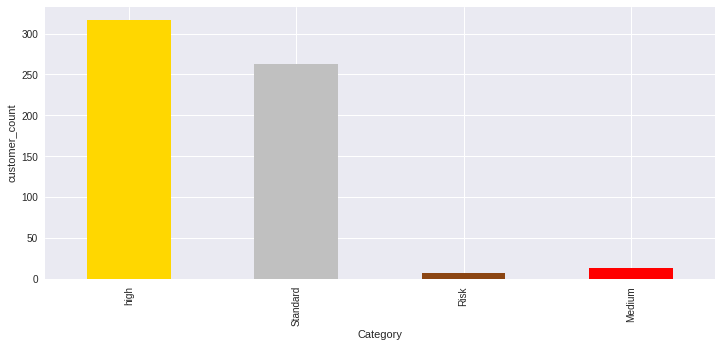

In [0]:
def plot_customer(df, n=4):
    '''
    Plots for bucketed customer.
    '''
    
    for customer_category in ['high','Standard','Risk', 'Medium']:
        
        plot_colors = ['gold', 'silver', 'saddlebrown', 'red']
    ax = df[['high','Standard','Risk', 'Medium']][:n]\
        .plot(kind='bar', figsize=(12,5), color=plot_colors)
    ax.set_xlabel("Category")
    ax.set_ylabel("customer_count")
    plt.show()
    
plot_customer(customer_by_category(cus_cat_df_))

In [0]:
def filter_customer(search_term):
    return cus_cat_df_[cus_cat_df_.MONTH_.str.contains(search_term, case=False) \
                     | cus_cat_df_.Category.str.contains(search_term, case=False)]
    

In [0]:
@interact(search='')
def search_and_plot_categories(search):
    '''
    Display customer when given a search term.
    '''
    filtered_customer = filter_customer(search)
    if len(filtered_customer) == 0:
        print ("No hits")
        return
      
      
      # show plot 
    plot_customer(customer_by_category(filtered_customer))
    # output results
    display(filtered_customer)
    
  

interactive(children=(Text(value='', description='search'), Output()), _dom_classes=('widget-interact',))

# Building models for churn prediction

In [0]:
from sklearn.model_selection import train_test_split
def evaluation_model(model):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    cm =confusion_matrix(y_test,y_pred)
    cr= classification_report(y_test,y_pred)
    
    
    print (cm)
    print (cr)
    
    return score

all_models= {}

In [0]:


X= file.drop(["LocationName", "CustomerChurn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = None, stratify = y)

In [0]:
import pandas as pd 
import numpy as np 
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import os
from sklearn.model_selection  import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score, recall_score,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

All Algorithm 

In [35]:

clf = DecisionTreeClassifier()
all_models['clf'] = {'model': clf,
                     'scores': evaluation_model(clf)}

[[161   0]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.89      0.94        19

   micro avg       0.99      0.99      0.99       180
   macro avg       0.99      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180



In [36]:
a = evaluation_model(KNeighborsClassifier())

[[160   1]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       161
           1       0.00      0.00      0.00        19

   micro avg       0.89      0.89      0.89       180
   macro avg       0.45      0.50      0.47       180
weighted avg       0.80      0.89      0.84       180



In [0]:
params = {'n_neighbors' : np.arange(2, 13)}
from sklearn.metrics import *

rsknn = RandomizedSearchCV(KNeighborsClassifier(),
                     params, n_jobs =-1,
                     cv = 5)

In [46]:
rsknn.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [47]:
rsknn.best_params_

{'n_neighbors': 12}

In [50]:
rsknn.best_score_

0.89

In [52]:
evaluation_model(rsknn.best_estimator_)

[[161   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       161
           1       0.00      0.00      0.00        19

   micro avg       0.89      0.89      0.89       180
   macro avg       0.45      0.50      0.47       180
weighted avg       0.80      0.89      0.84       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8944444444444445

In [42]:
bagginknn = BaggingClassifier(KNeighborsClassifier())
evaluation_model(bagginknn)

[[159   2]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       161
           1       0.00      0.00      0.00        19

   micro avg       0.88      0.88      0.88       180
   macro avg       0.45      0.49      0.47       180
weighted avg       0.80      0.88      0.84       180



0.8833333333333333

In [0]:
bagging_params = { 'n_estimators': [1,12],
                    'max_features': [0.7, 1.0],
                     'max_samples': [0.7, 1.0],
                      'bootstrap_features': [True,False]}


rsbagginknn = RandomizedSearchCV(bagginknn, 
                            bagging_params, n_jobs= -1, cv =5)

In [54]:
rsbagginknn.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [1, 12], 'max_features': [0.7, 1.0], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [55]:
rsbagginknn.best_params_

{'bootstrap_features': True,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 12}

In [56]:
all_models['rsbagginknn'] = {'model': gsbagginknn.best_estimator_,
                     'scores': evaluation_model(gsbagginknn.best_estimator_)}

[[161   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       161
           1       0.00      0.00      0.00        19

   micro avg       0.89      0.89      0.89       180
   macro avg       0.45      0.50      0.47       180
weighted avg       0.80      0.89      0.84       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                     'scores': evaluation_model(lr)}

[[161   0]
 [ 10   9]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       1.00      0.47      0.64        19

   micro avg       0.94      0.94      0.94       180
   macro avg       0.97      0.74      0.81       180
weighted avg       0.95      0.94      0.94       180



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
params = { 'C': [0.001,0.01, 0.1,1.0, 10.0, 100.0 ]}
gslr = GridSearchCV(lr, params, n_jobs =-1, cv =5)

gslr.fit(X,y)

print(gslr.best_params_)
print(gslr.best_score_)

{'C': 10.0}
0.975


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
all_models['gslr'] = {'model': gslr.best_estimator_,
                     'scores': evaluation_model(gslr.best_estimator_)}

[[161   0]
 [  3  16]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.84      0.91        19

   micro avg       0.98      0.98      0.98       180
   macro avg       0.99      0.92      0.95       180
weighted avg       0.98      0.98      0.98       180



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
params = {'criterion': [ 'gini', 'entropy'],
           'splitter' : ['best', 'random'],
           'max_depth' : [3, 5,10],
        'min_samples_split' : [2,5],
        'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(clf, params, n_jobs=-1, cv= 5)



In [86]:
gsdt.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
all_models['gsdt'] = {'model': gsdt.best_estimator_,
                     'scores': evaluation_model(gsdt.best_estimator_)}

[[161   0]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.89      0.94        19

   micro avg       0.99      0.99      0.99       180
   macro avg       0.99      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180



In [0]:
bagging_params = { 'n_estimators': [1,12],
                    'max_features': [0.7, 1.0],
                     'max_samples': [0.7, 1.0],
                      'bootstrap_features': [True,False]}

gsbaggindt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_), bagging_params, n_jobs=-1, cv =5)

In [89]:
gsbaggindt.fit(X,y)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min...stimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [1, 12], 'max_features': [0.7, 1.0], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
print(gsbaggindt.best_params_)
print(gsbaggindt.best_score_)

{'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 12}
0.9833333333333333


In [74]:
all_models['gsbaggindt'] = {'model': gsbaggindt.best_estimator_,
                     'scores': evaluation_model(gsbaggindt.best_estimator_)}

[[161   0]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.89      0.94        19

   micro avg       0.99      0.99      0.99       180
   macro avg       0.99      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180



In [75]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf =RandomForestClassifier()



all_models['rf'] = {'model': rf,
                     'scores': evaluation_model(rf)}

et = ExtraTreesClassifier()

all_models['et'] = {'model': et,
                     'scores': evaluation_model(et)}

[[161   0]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.89      0.94        19

   micro avg       0.99      0.99      0.99       180
   macro avg       0.99      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180

[[161   0]
 [  3  16]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.84      0.91        19

   micro avg       0.98      0.98      0.98       180
   macro avg       0.99      0.92      0.95       180
weighted avg       0.98      0.98      0.98       180



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
params = {
           'n_estimators' : [3,5,10,50],
           
        'max_features': ['auto', 'sqrt', 'log2']}

gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs= -1, cv= 5)


gsrf.fit(X,y)

print(gsrf.best_params_)
print(gsrf.best_score_)



all_models['gsrf'] = {'model': gsrf.best_estimator_,
                     'scores': evaluation_model(gsrf.best_estimator_)}

{'max_features': 'log2', 'n_estimators': 50}
0.9816666666666667
[[161   0]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.89      0.94        19

   micro avg       0.99      0.99      0.99       180
   macro avg       0.99      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180



In [78]:

gset = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs= -1, cv= 5)


gset.fit(X,y)

print(gset.best_params_)
print(gset.best_score_)



all_models['gset'] = {'model': gset.best_estimator_,
                     'scores': evaluation_model(gset.best_estimator_)}

{'max_features': 'auto', 'n_estimators': 50}
0.975
[[161   0]
 [  2  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.89      0.94        19

   micro avg       0.99      0.99      0.99       180
   macro avg       0.99      0.95      0.97       180
weighted avg       0.99      0.99      0.99       180



#DATA TRANSFORMATION

In [0]:
from sklearn.neighbors import KDTree #Augmenting the observed categorical outcomes
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=13, algorithm='kd_tree').fit(X) 
distances, indices = nbrs.kneighbors(X)
distances
df= pd.DataFrame(distances)
df

In [31]:
from sklearn.feature_selection import SelectKBest
%matplotlib inline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
import datetime as dt
from sklearn import preprocessing
 
from sklearn.feature_selection import SelectKBest
%matplotlib inline


import pandas as pd
file = pd.read_csv("customer_data.csv")



le = preprocessing.LabelEncoder()
file['Zip']= le.fit_transform(file['Zip'].astype('str'))
file['LastInvoiceDate'] = le.fit_transform(file['LastInvoiceDate'].astype('str'))


X= file.drop(["CustomerChurn", "LocationName"],  axis =1 )
y = file.CustomerChurn


chi2_selector = SelectKBest(chi2, k=4)
X_kbest = chi2_selector.fit_transform(X, y)


X_kbest

array([[26342.       ,   160.       ,  4935.       ,   433.5024921],
       [38851.       ,   490.       , 24312.       ,  2401.160037 ],
       [32312.       ,   336.       ,  5881.       ,   568.082307 ],
       ...,
       [47439.       ,     0.       , 17916.       ,  1751.595427 ],
       [34000.       ,   113.       , 34003.       ,  3355.299417 ],
       [52006.       ,   117.       ,  9131.       ,   853.1200328]])

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:

X1 = file.drop(["Customer Id", "VolumeChange","LocationName", "Zip", "AvgMiles", "LastInvoiceDate","CustomerChurn"], axis =1)
Y = file.CustomerChurn

clf = BernoulliNB()
clf.fit(X1, Y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
clf.predict(X1)


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
cross_val_score(clf, X1, Y, cv=10)

array([0.86885246, 0.98360656, 1.        , 1.        , 0.98360656,
       1.        , 0.96610169, 0.98305085, 0.98305085, 1.        ])

In [0]:
#Running algorithm for the transformed dataset for comparison Using CHAID for added accuracy in terms of the goal of explanatory

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name =fn, length =len(uploaded[fn])))



Saving Capture.JPG to Capture.JPG
User uploaded file "Capture.JPG" with length 31770 bytes


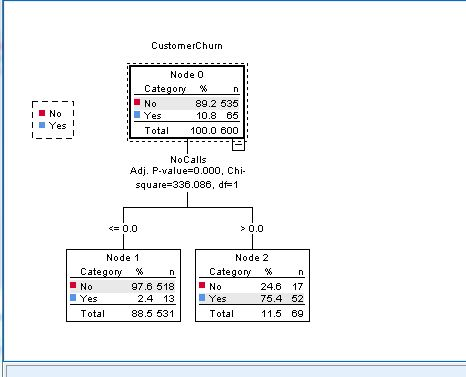

In [0]:
from IPython.display import Image, display
Image('Capture.JPG', width = 1200)


# SQL - Using Python

In [0]:
!pip install ibm_db

    100% |████████████████████████████████| 788kB 5.7MB/s 
  Running setup.py bdist_wheel for ibm-db ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/ef/89/0f/54c86862cc233535d07492a6f58ad5905e9bf922fb27e72a68
Successfully built ibm-db


In [0]:
import ibm_db

In [0]:
dsn_hostname = "dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net"
dsn_uid =      "kld43050"
dsn_pwd =      "jxn1fnf5njg75+w2"
dsn_protocol=  "TCPIP"
dsn_driver =   "{IBM DB2 ODBC DRIVER"
dsn_database=  "BLUDB"
dsn_port =     "50000"

In [0]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

In [0]:
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER;DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=kld43050;PWD=jxn1fnf5njg75+w2;


In [0]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected!")

except:
    print ("Unable to connect to database")

Connected!


In [0]:
#Construct the query that retrieves all rows from the ANALYSIS2 table
selectQuery= "SELECT * FROM ANALYSIS2"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)

{0: 26342,
 1: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 1,
 2: datetime.date(2014, 8, 5),
 3: 4935,
 4: 'Carlyle,Illinois',
 5: '62231',
 6: '433.50249210',
 7: 0,
 8: 0,
 9: 0,
 'AvgInvoiceAmount': 4935,
 'AvgMiles': '433.50249210',
 'ClaimsMade': 0,
 'CompetitorsPresent': 0,
 'CurrentInflation': 1,
 'CustomerChurn': 1,
 'Customer_Id': 26342,
 'DelayedQuote': 0,
 'DeliveryDelay': 0,
 'LastInvoiceDate': datetime.date(2014, 8, 5),
 'LocationName': 'Carlyle,Illinois',
 'NoCalls': 0,
 'PickupDelay': 0,
 'PriceChangedPostQuote': 0,
 'VolumeChange': 0,
 'Zip': '62231'}